In [19]:
import numpy as np
from joblib import load
import pandas as pd
import os

In [60]:
# Baselines
"""
site SDSU contains 36 subjects.
Number of ASD in SDSU: 14
Number of TD in SDSU: 22
Baseline performance = 61.111111111111114%

site CMU contains 27 subjects.
Number of ASD in CMU: 14
Number of TD in CMU: 13
Baseline performance = 51.85185185185185%


site KKI contains 34 subjects.
Number of ASD in KKI: 8
Number of TD in KKI: 26
Baseline performance = 76.47058823529412%
Ignoring KKI with baseline 76.47058823529412%.


site Leuven contains 63 subjects.
Number of ASD in Leuven: 29
Number of TD in Leuven: 34
Baseline performance = 53.96825396825397%


site NYU contains 138 subjects.
Number of ASD in NYU: 38
Number of TD in NYU: 100
Baseline performance = 72.46376811594203%
Ignoring NYU with baseline 72.46376811594203%.


site Pitt contains 56 subjects.
Number of ASD in Pitt: 29
Number of TD in Pitt: 27
Baseline performance = 51.78571428571429%

site MaxMun contains 51 subjects.
Number of ASD in MaxMun: 23
Number of TD in MaxMun: 28
Baseline performance = 54.90196078431373%

site Stanford contains 38 subjects.
Number of ASD in Stanford: 19
Number of TD in Stanford: 19
Baseline performance = 50.0%

site Caltech contains 37 subjects.
Number of ASD in Caltech: 19
Number of TD in Caltech: 18
Baseline performance = 51.35135135135135%

site UCLA contains 95 subjects.
Number of ASD in UCLA: 53
Number of TD in UCLA: 42
Baseline performance = 55.78947368421052%


site Yale contains 56 subjects.
Number of ASD in Yale: 28
Number of TD in Yale: 28
Baseline performance = 50.0%

site USM contains 71 subjects.
Number of ASD in USM: 46
Number of TD in USM: 25
Baseline performance = 64.7887323943662%

site UM contains 134 subjects.
Number of ASD in UM: 61
Number of TD in UM: 73
Baseline performance = 54.47761194029851%

site Trinity contains 47 subjects.
Number of ASD in Trinity: 22
Number of TD in Trinity: 25
Baseline performance = 53.191489361702125%

site SBL contains 15 subjects.
Number of ASD in SBL: 0
Number of TD in SBL: 15
Baseline performance = 100.0%

site Olin contains 34 subjects.
Number of ASD in Olin: 19
Number of TD in Olin: 15
Baseline performance = 55.88235294117647%

site OHSU contains 26 subjects.
Number of ASD in OHSU: 12
Number of TD in OHSU: 14
Baseline performance = 53.84615384615385%

"""
NUM_SAMPLES = {
    'SDSU': 36,
    'KKI': 34, # Ignored
    'Leuven': 63,
    'CMU': 27,
    'NYU': 138, # Ignored
    'Pitt': 56,
    'MaxMun': 51,
    'Caltech': 37,
    'Stanford': 38,
    'UCLA': 95,
    'Yale': 56,
    'USM' : 71,
    'UM': 134,
    'Trinity': 47,
    'SBL': 15, # Ignored
    'Olin': 34,
    'OHSU': 26
}
BASELINES = {
    'SDSU': 0.6111111,
    'KKI': 0.7647, # Ignored
    'Leuven': 0.539682,
    'CMU': 0.51851,
    'NYU': 0.7246, # Ignored
    'Pitt': 0.5178,
    'MaxMun': 0.549019,
    'Caltech': 0.5135,
    'Stanford': 0.5,
    'UCLA': 0.55789,
    'Yale': 0.5,
    'USM' : 0.6478,
    'UM': 0.54477,
    'Trinity': 0.531914,
    'SBL': 1, # Ignored
    'Olin': 0.5588,
    'OHSU': 0.53846
}

In [34]:
RESULTS_DIR = './Results/site_analysis/'
DATADIR_aparc_ALLASDINC_LEFT = 'D:\\PhD\\Data\\aparc\\df_left_aparc_ALLASDINC.csv'
DATADIR_aparc_ALLASDINC_RIGHT = 'D:\\PhD\\Data\\aparc\\df_right_aparc_ALLASDINC.csv'
df_aparc_left = pd.read_csv(DATADIR_aparc_ALLASDINC_LEFT, index_col=0)
df_aparc_right = pd.read_csv(DATADIR_aparc_ALLASDINC_RIGHT, index_col=0)

files = os.listdir(RESULTS_DIR)
print(files)

['obj_left_rf_Caltech.joblib', 'obj_left_rf_CMU.joblib', 'obj_left_rf_Leuven.joblib', 'obj_left_rf_MaxMun.joblib', 'obj_left_rf_OHSU.joblib', 'obj_left_rf_Olin.joblib', 'obj_left_rf_Pitt.joblib', 'obj_left_rf_SDSU.joblib', 'obj_left_rf_Stanford.joblib', 'obj_left_rf_Trinity.joblib', 'obj_left_rf_UCLA.joblib', 'obj_left_rf_UM.joblib', 'obj_left_rf_USM.joblib', 'obj_left_rf_Yale.joblib', 'obj_left_svm_Caltech.joblib', 'obj_left_svm_CMU.joblib', 'obj_left_svm_Leuven.joblib', 'obj_left_svm_MaxMun.joblib', 'obj_left_svm_OHSU.joblib', 'obj_left_svm_Olin.joblib', 'obj_left_svm_Pitt.joblib', 'obj_left_svm_SDSU.joblib', 'obj_left_svm_Stanford.joblib', 'obj_left_svm_Trinity.joblib', 'obj_left_svm_UCLA.joblib', 'obj_left_svm_UM.joblib', 'obj_left_svm_USM.joblib', 'obj_left_svm_Yale.joblib', 'obj_right_rf_Caltech.joblib', 'obj_right_rf_CMU.joblib', 'obj_right_rf_Leuven.joblib', 'obj_right_rf_MaxMun.joblib', 'obj_right_rf_OHSU.joblib', 'obj_right_rf_Olin.joblib', 'obj_right_rf_Pitt.joblib', 'obj_ri

In [22]:
left_obj = [obj for obj in files if obj.split('_')[1]=='left']
right_obj = [obj for obj in files if obj.split('_')[1]=='right']

In [23]:
left_rf_obj = [obj for obj in left_obj if obj.split('_')[2]=='rf']
left_svm_obj = [obj for obj in left_obj if obj.split('_')[2]=='svm']
right_rf_obj = [obj for obj in right_obj if obj.split('_')[2]=='rf']
right_svm_obj = [obj for obj in right_obj if obj.split('_')[2]=='svm']

In [24]:
len(left_rf_obj),len(left_svm_obj),len(right_rf_obj),len(right_svm_obj)

(14, 14, 14, 14)

In [25]:
left_rf_obj

['obj_left_rf_Caltech.joblib',
 'obj_left_rf_CMU.joblib',
 'obj_left_rf_Leuven.joblib',
 'obj_left_rf_MaxMun.joblib',
 'obj_left_rf_OHSU.joblib',
 'obj_left_rf_Olin.joblib',
 'obj_left_rf_Pitt.joblib',
 'obj_left_rf_SDSU.joblib',
 'obj_left_rf_Stanford.joblib',
 'obj_left_rf_Trinity.joblib',
 'obj_left_rf_UCLA.joblib',
 'obj_left_rf_UM.joblib',
 'obj_left_rf_USM.joblib',
 'obj_left_rf_Yale.joblib']

## Sites used in analysis, almost balanced are 14 sites

In [35]:
left_columns = df_aparc_left.columns.drop(['age','sex','labels'])
right_columns = df_aparc_right.columns.drop(['age','sex','labels'])
left_columns, right_columns

(Index(['area_lbankssts_medMIQR', 'area_lbankssts_medPIQR',
        'area_lcaudalanteriorcingulate_medMIQR',
        'area_lcaudalanteriorcingulate_medPIQR',
        'area_lcaudalmiddlefrontal_medMIQR',
        'area_lcaudalmiddlefrontal_medPIQR', 'area_lcuneus_medMIQR',
        'area_lcuneus_medPIQR', 'area_lentorhinal_medMIQR',
        'area_lentorhinal_medPIQR',
        ...
        'volume_lsupramarginal_medMIQR', 'volume_lsupramarginal_medPIQR',
        'volume_lfrontalpole_medMIQR', 'volume_lfrontalpole_medPIQR',
        'volume_ltemporalpole_medMIQR', 'volume_ltemporalpole_medPIQR',
        'volume_ltransversetemporal_medMIQR',
        'volume_ltransversetemporal_medPIQR', 'volume_linsula_medMIQR',
        'volume_linsula_medPIQR'],
       dtype='object', length=272),
 Index(['area_rbankssts_medMIQR', 'area_rbankssts_medPIQR',
        'area_rcaudalanteriorcingulate_medMIQR',
        'area_rcaudalanteriorcingulate_medPIQR',
        'area_rcaudalmiddlefrontal_medMIQR',
        'are

In [37]:
site_selected_feats_dict = dict()
for site in BASELINES:
    baseline = BASELINES[site]
    if baseline > 0.65:
        continue
    
    # Get file name
    left_rf_obj_site = [obj for obj in left_rf_obj if obj.split('_')[-1].split('.')[0]==site][0]
    right_rf_obj_site = [obj for obj in right_rf_obj if obj.split('_')[-1].split('.')[0]==site][0]
    left_svm_obj_site = [obj for obj in left_svm_obj if obj.split('_')[-1].split('.')[0]==site][0]
    right_svm_obj_site = [obj for obj in right_svm_obj if obj.split('_')[-1].split('.')[0]==site][0]
    
    # Load files
    left_rf_obj_site = load(os.path.join(RESULTS_DIR, left_rf_obj_site))
    left_svm_obj_site = load(os.path.join(RESULTS_DIR, left_svm_obj_site))
    right_rf_obj_site = load(os.path.join(RESULTS_DIR, right_rf_obj_site))
    right_svm_obj_site = load(os.path.join(RESULTS_DIR, right_svm_obj_site))
    
    # Extract those areas from the data matrix
    left_rf_selectedFeats = left_columns[np.where(left_rf_obj_site.ranking_==1)[0]]
    left_svm_selectedFeats = left_columns[np.where(left_svm_obj_site.ranking_==1)[0]]
    right_rf_selectedFeats = left_columns[np.where(right_rf_obj_site.ranking_==1)[0]]
    right_svm_selectedFeats = left_columns[np.where(right_svm_obj_site.ranking_==1)[0]]
    
    site_selected_feats_dict[site] = {
        'LEFT-RF': left_rf_selectedFeats,
        'LEFT-SVM': left_svm_selectedFeats,
        'RIGHT-RF': right_rf_selectedFeats,
        'RIGHT-SVM': right_svm_selectedFeats, 
    }
    

    

In [41]:
# Load old dataset
df_left = pd.read_csv('D:\\PhD\\Data\\aparc\\df_left_newRepresentation.csv', index_col=0)
df_right = pd.read_csv('D:\\PhD\\Data\\aparc\\df_right_newRepresentation.csv', index_col=0)
old_left_feats = df_left.columns.drop(['age','sex','labels'])
old_right_feats = df_right.columns.drop(['age','sex','labels'])

In [69]:
# Load the global features
left_rf_global_nocorr = load('./Results_NOCORRANA/FS/left_rf_modifiedMedPIQR_nocorr.joblib')
left_svm_global_nocorr = load('./Results_NOCORRANA/FS/left_svc_modifiedMedPIQR_nocorr.joblib')
right_rf_global_nocorr = load('./Results_NOCORRANA/FS/right_rf_modifiedMedPIQR_nocorr.joblib')
right_svm_global_nocorr = load('./Results_NOCORRANA/FS/right_svc_modifiedMedPIQR_nocorr.joblib')

left_rf_global = load('./Results/FS/left_rf_modifiedMedPIQR.joblib')
left_svm_global = load('./Results/FS/left_svc_modifiedMedPIQR.joblib')
right_rf_global = load('./Results/FS/right_rf_modifiedMedPIQR.joblib')
right_svm_global = load('./Results/FS/right_svc_modifiedMedPIQR.joblib')


left_rf_global_feats = old_left_feats[np.where(left_rf_global.ranking_==1)[0]]
left_svm_global_feats = old_left_feats[np.where(left_svm_global.ranking_==1)[0]]
right_rf_global_feats = old_right_feats[np.where(right_rf_global.ranking_==1)[0]]
right_svm_global_feats = old_right_feats[np.where(right_svm_global.ranking_==1)[0]]

def convert_oldname2newname(feats):
    new_name = list()
    for feat in feats:
        name_parts = feat.split('_')
        morph = name_parts[0]
        if 'vol' in morph:
            morph = 'volume'
        elif 'thi' in morph:
            morph = 'thickness'
        elif 'ar' in morph:
            morph = 'area'
        elif 'cu' in morph:
            morph = 'curv'
        name_parts[0] = morph
        new_name.append('_'.join(name_parts))
    return new_name

left_rf_global_feats = convert_oldname2newname(left_rf_global_feats)
left_svm_global_feats = convert_oldname2newname(left_svm_global_feats)
right_rf_global_feats = convert_oldname2newname(right_rf_global_feats)
right_svm_global_feats = convert_oldname2newname(right_svm_global_feats)


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 2., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
        2., 0., 0., 1., 1., 1., 1., 1., 1., 2., 2., 0., 4., 4., 6., 9., 4.,
        8., 4., 7., 2., 5., 4., 8., 0., 2., 5., 0., 1., 2.]),
 array([0.46283487, 0.46379917, 0.46476346, 0.46572776, 0.46669206,
        0.46765635, 0.46862065, 0.46958495, 0.47054924, 0.47151354,
        0.47247784, 0.47344213, 0.47440643, 0.47537072, 0.47633502,
        0.47729932, 0.47826361, 0.47922791, 0.48019221, 0.4811565 ,
        0.4821208 , 0.4830851 , 0.48404939, 0.48501369, 0.48597799,
        0.48694228, 0.48790658, 0.48887088, 0.48983517, 0.49079947,
        0.49176377, 0.49272806, 0.49369236, 0.49465665, 0.49562095,
        0.49658525, 0.49754954, 0.49851384, 0.49947814, 0.50044243,
        0.50140673, 0.50237103, 0.50333532, 0.50429962, 0.50526392,
        0.50622821, 0.50719251, 0.50815681, 0.5091211 , 0.5100854 ,
        0.5110497 , 0.51201399

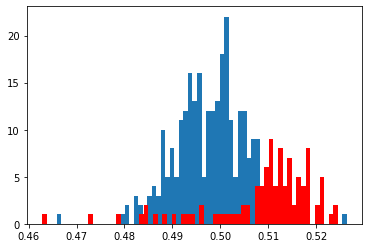

In [80]:
import matplotlib.pyplot as plt
np.median(left_rf_global_nocorr.grid_scores_), np.median(left_rf_global.grid_scores_)
# left_svm_global = load('./Results_NOCORRANA/FS/left_svc_modifiedMedPIQR_nocorr.joblib')
# right_rf_global = load('./Results_NOCORRANA/FS/right_rf_modifiedMedPIQR_nocorr.joblib')
# right_svm_global = load('./Results_NOCORRANA/FS/right_svc_modifiedMedPIQR_nocorr.joblib')
plt.hist(left_rf_global_nocorr.grid_scores_, bins=64)
plt.hist(left_rf_global.grid_scores_, bins=64, color='r')

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 1., 0., 0., 1., 0., 2., 1., 1., 4., 0., 2., 5., 1.,
        2., 4., 1., 4., 6., 4., 4., 4., 5., 4., 4., 4., 6., 4., 0., 3., 3.,
        1., 0., 4., 3., 1., 0., 2., 0., 0., 1., 1., 1., 2.]),
 array([0.4759025 , 0.47671576, 0.47752903, 0.47834229, 0.47915555,
        0.47996881, 0.48078207, 0.48159534, 0.4824086 , 0.48322186,
        0.48403512, 0.48484838, 0.48566164, 0.48647491, 0.48728817,
        0.48810143, 0.48891469, 0.48972795, 0.49054121, 0.49135448,
        0.49216774, 0.492981  , 0.49379426, 0.49460752, 0.49542078,
        0.49623405, 0.49704731, 0.49786057, 0.49867383, 0.49948709,
        0.50030035, 0.50111362, 0.50192688, 0.50274014, 0.5035534 ,
        0.50436666, 0.50517992, 0.50599319, 0.50680645, 0.50761971,
        0.50843297, 0.50924623, 0.51005949, 0.51087276, 0.51168602,
        0.51249928, 0.51331254, 0.5141258 , 0.51493906, 0.51575233,
        0.51656559, 0.51737885

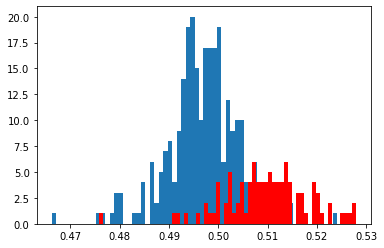

In [81]:
plt.hist(right_rf_global_nocorr.grid_scores_, bins=64)
plt.hist(right_rf_global.grid_scores_, bins=64, color='r')

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  3.,  2.,  2.,
         1.,  0.,  1.,  0.,  3.,  5.,  0.,  5.,  0.,  5.,  2.,  2., 10.,
         1.,  5.,  0.,  7.,  2.,  3.,  3.,  0.,  6.,  0.,  4.,  3.,  2.,
         2.,  2.,  1.,  2.,  2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  1.]),
 array([0.49738691, 0.49802392, 0.49866093, 0.49929794, 0.49993495,
        0.50057196, 0.50120896, 0.50184597, 0.50248298, 0.50311999,
        0.503757  , 0.50439401, 0.50503102, 0.50566803, 0.50630503,
        0.50694204, 0.50757905, 0.50821606, 0.50885307, 0.50949008,
        0.51012709, 0.51076409, 0.5114011 , 0.51203811, 0.51267512,
        0.51331213, 0.51394914, 0.51458615, 0.51522316, 0.51586016,
        0.51649717, 0.51713418, 0.51777119, 0.5184082 , 0.51904521,
        0.51968222, 0.52031922, 0.52095623, 0.52159324, 0.52223025,
        0.52286726, 0.52350427, 0.52414128, 0.52477829, 0.52541529,
        0.5260523 , 0.5266

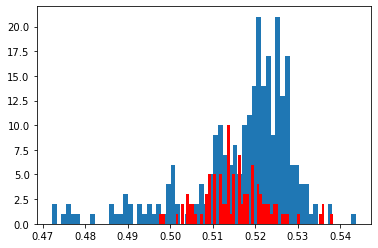

In [82]:
plt.hist(left_svm_global_nocorr.grid_scores_, bins=64)
plt.hist(left_svm_global.grid_scores_, bins=64, color='r')

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  3.,  2.,  2.,
         1.,  0.,  1.,  0.,  3.,  5.,  0.,  5.,  0.,  5.,  2.,  2., 10.,
         1.,  5.,  0.,  7.,  2.,  3.,  3.,  0.,  6.,  0.,  4.,  3.,  2.,
         2.,  2.,  1.,  2.,  2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  1.]),
 array([0.49738691, 0.49802392, 0.49866093, 0.49929794, 0.49993495,
        0.50057196, 0.50120896, 0.50184597, 0.50248298, 0.50311999,
        0.503757  , 0.50439401, 0.50503102, 0.50566803, 0.50630503,
        0.50694204, 0.50757905, 0.50821606, 0.50885307, 0.50949008,
        0.51012709, 0.51076409, 0.5114011 , 0.51203811, 0.51267512,
        0.51331213, 0.51394914, 0.51458615, 0.51522316, 0.51586016,
        0.51649717, 0.51713418, 0.51777119, 0.5184082 , 0.51904521,
        0.51968222, 0.52031922, 0.52095623, 0.52159324, 0.52223025,
        0.52286726, 0.52350427, 0.52414128, 0.52477829, 0.52541529,
        0.5260523 , 0.5266

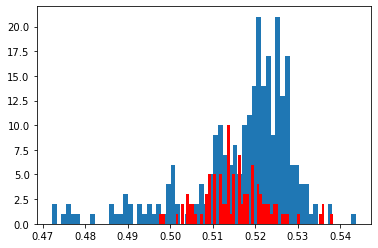

In [83]:
plt.hist(right_svm_global_nocorr.grid_scores_, bins=64)
plt.hist(right_svm_global.grid_scores_, bins=64, color='r')

In [65]:
from collections import defaultdict
common_site_global_rf = defaultdict(list)
common_site_global_svm = defaultdict(list)

for site in site_selected_feats_dict:
    models_dict = site_selected_feats_dict[site]
    left_rf_site = models_dict['LEFT-RF']
    left_svm_site = models_dict['LEFT-SVM']
    right_rf_site = models_dict['RIGHT-RF']
    right_svm_site = models_dict['RIGHT-SVM']

    for feat in left_rf_site:
        if feat in left_rf_global_feats:
            common_site_global_rf[site].append(feat)
            
    for feat in left_svm_site:
        if feat in left_svm_global_feats:
            common_site_global_svm[site].append(feat)
            
    for feat in right_rf_site:
        if feat in right_rf_global_feats:
            common_site_global_rf[site].append(feat)
            
    for feat in right_svm_site:
        if feat in right_svm_global_feats:
            common_site_global_svm[site].append(feat)
            

In [67]:
print(f"Total number of global left RF features: {len(left_rf_global_feats)}")
print(f"Total number of global right RF features: {len(right_rf_global_feats)}")
print(f"Total number of global left SVM features: {len(left_svm_global_feats)}")
print(f"Total number of global right SVM features: {len(right_svm_global_feats)}")
for site in common_site_global_rf:
    print(f"{site} with size {NUM_SAMPLES[site]} has {len(site_selected_feats_dict[site]['LEFT-RF'])+len(site_selected_feats_dict[site]['RIGHT-RF'])} features shares RF {len(common_site_global_rf[site])} of {len(left_rf_global_feats)+len(right_rf_global_feats)}")
    
for site in common_site_global_svm:
    print(f"{site} with size {NUM_SAMPLES[site]} has {len(site_selected_feats_dict[site]['LEFT-SVM'])+len(site_selected_feats_dict[site]['RIGHT-SVM'])} features shares SVM {len(common_site_global_svm[site])} of {len(left_svm_global_feats)+len(right_svm_global_feats)}")

Total number of global left RF features: 6
Total number of global right RF features: 6
Total number of global left SVM features: 5
Total number of global right SVM features: 5
SDSU with size 36 has 290 features shares RF 2 of 12
Leuven with size 63 has 494 features shares RF 5 of 12
CMU with size 27 has 251 features shares RF 1 of 12
Pitt with size 56 has 237 features shares RF 1 of 12
MaxMun with size 51 has 476 features shares RF 5 of 12
Stanford with size 38 has 63 features shares RF 2 of 12
UCLA with size 95 has 333 features shares RF 2 of 12
Yale with size 56 has 247 features shares RF 5 of 12
USM with size 71 has 82 features shares RF 2 of 12
UM with size 134 has 226 features shares RF 2 of 12
Olin with size 34 has 143 features shares RF 3 of 12
OHSU with size 26 has 310 features shares RF 3 of 12
CMU with size 27 has 243 features shares SVM 4 of 10
Caltech with size 37 has 207 features shares SVM 3 of 10
Stanford with size 38 has 276 features shares SVM 1 of 10
UCLA with size 95